In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
vehicles_list = ['ICEV','PHEV','BEV','FCEV']
demand_list = ['normal','EU100','EU0']
demand_label = {'normal':'Based on Actual Market Shares',
                'EU100':'All served by EU Product',
                'EU0':'All served by NON EU Product'}

scenario_list = ["Projection-APS","Projection-STEPS"]

EV_list = ["PHEV","BEV","FCEV"]

colors_all = ['#ff741f','#065dc2', '#238c43', '#c4a3db' ]
colors_ev = colors_all[1:]
grey_color = '#acb6c2'
year_list = [2023,2025,2030,2035]

In [3]:
file_path = "inputs/input_manufacturing.csv"
requirement = pd.read_csv(file_path)
requirement.iloc[:, 2:] = requirement.iloc[:, 2:] * 1000000 # from million euros to euros

top_product_number = 15

requirement.drop(columns=["Code"],inplace=True)
requirement.set_index("Product",inplace=True)

requirement["mean"] = requirement.mean(axis=1)
top_products = requirement.nlargest(top_product_number, 'mean')
requirement_top = top_products[vehicles_list]

In [4]:
requirement_top

,ICEV,PHEV,BEV,FCEV
Product,,,,
Electrical machinery and apparatus n.e.c. (31),280.8883,3717.8342,8871.7863,2980.9842
"Motor vehicles, trailers and semi-trailers (34)",4357.2888,4357.2892,2962.9567,1382.6571
Rubber and plastic products (25),273.5709,273.5709,273.5709,5125.4584
Chemicals nec,38.7493,38.7493,38.7493,3688.7333
Other business services (74),141.4341,1048.9223,1468.9413,389.3553
Other land transportation services,102.6843,1023.0983,1449.0998,375.8785
"Fabricated metal products, except machinery and equipment (28)",30.6007,31.8680,32.4546,1850.0568
Basic iron and steel and of ferro-alloys and first products thereof,290.2627,290.2627,290.2627,135.4504
Other non-metallic mineral products,12.3350,12.3350,12.3350,803.7237


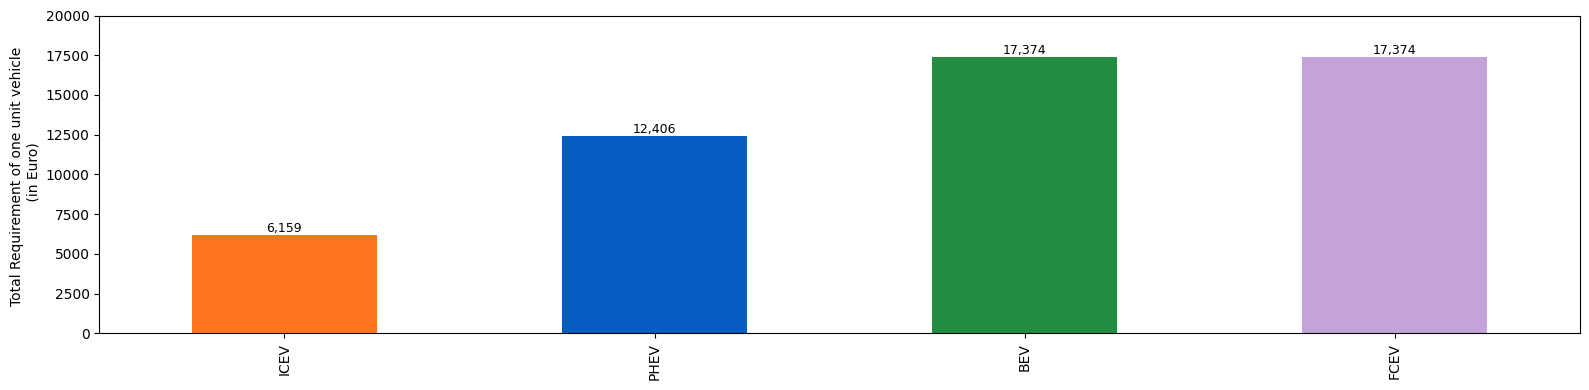

In [5]:
fig_width = 16
fig_height = 4

# Plot the data
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
bar_width = 0.5

requirement_vehicles = requirement.sum(axis=0)[vehicles_list]
requirement_vehicles.plot(kind='bar', y=vehicles_list, ax=ax, width=bar_width, color = colors_all)
ax.set_xlabel(None)
ax.set_ylabel("Total Requirement of one unit vehicle \n (in Euro)")
ax.set_ylim(0, 20000)
plt.xticks(rotation=90)
plt.tight_layout()


for container in ax.containers:
    labels = [f'{v.get_height():,.0f}' if v.get_height() > 0.1 else '' for v in container]
    ax.bar_label(container, label_type='edge', labels=labels, fontsize=9)

# Save the plot as an image file
plt.savefig('charts/vehicle_requirement_chart.png')

plt.show()

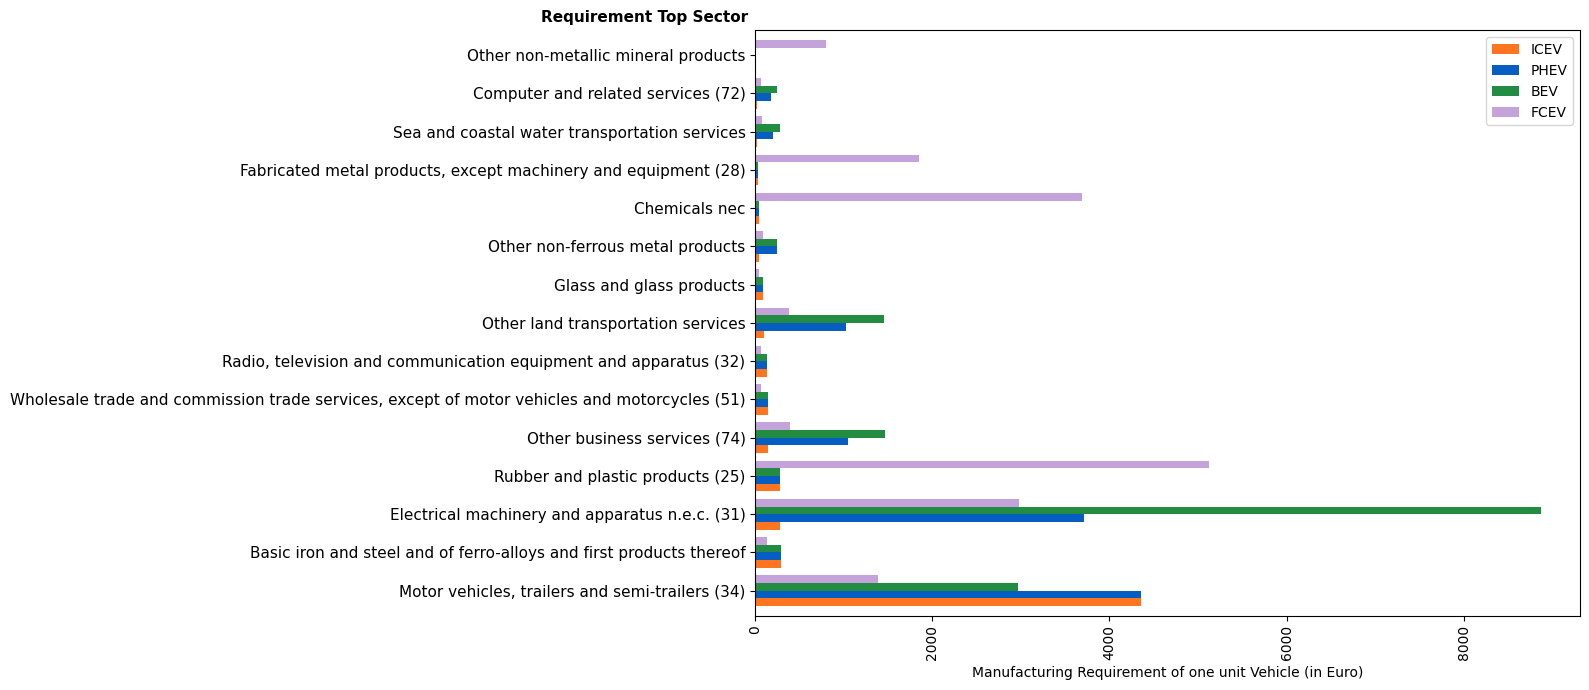

In [6]:
colors_all = ['#ff741f','#065dc2', '#238c43', '#c4a3db' ]

fig_width = 16
fig_height = 7

# Plot the data
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
bar_width = 0.8

data = requirement_top.sort_values("ICEV",ascending=False)
data.plot(kind='barh', y=vehicles_list, ax=ax, width=bar_width, color = colors_all)
ax.set_ylabel(None)
ax.set_xlabel("Manufacturing Requirement of one unit Vehicle (in Euro)")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)
ax.set_title("Requirement Top Sector",loc="left", x=-0.26, fontweight="bold", fontsize=11)
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('charts/vehicle_comparison_chart.png')

plt.show()

In [7]:
# exploring car sales 
file_path = "data/outlook_vehicles_sales.csv"
outlook = pd.read_csv(file_path)
outlook.drop(columns=["region"],inplace=True)
outlook.iloc[:, 2:] = outlook.iloc[:, 2:] / 1000000 # in million vehicles

outlook_sales_APS = outlook[outlook.category=="Projection-APS"]
outlook_sales_APS.set_index(keys=["year"],inplace=True)
outlook_sales_APS = outlook_sales_APS[vehicles_list] 
outlook_sales_STEPS = outlook[outlook.category=="Projection-STEPS"]
outlook_sales_STEPS.set_index(keys=["year"],inplace=True)
outlook_sales_STEPS = outlook_sales_STEPS[vehicles_list] 

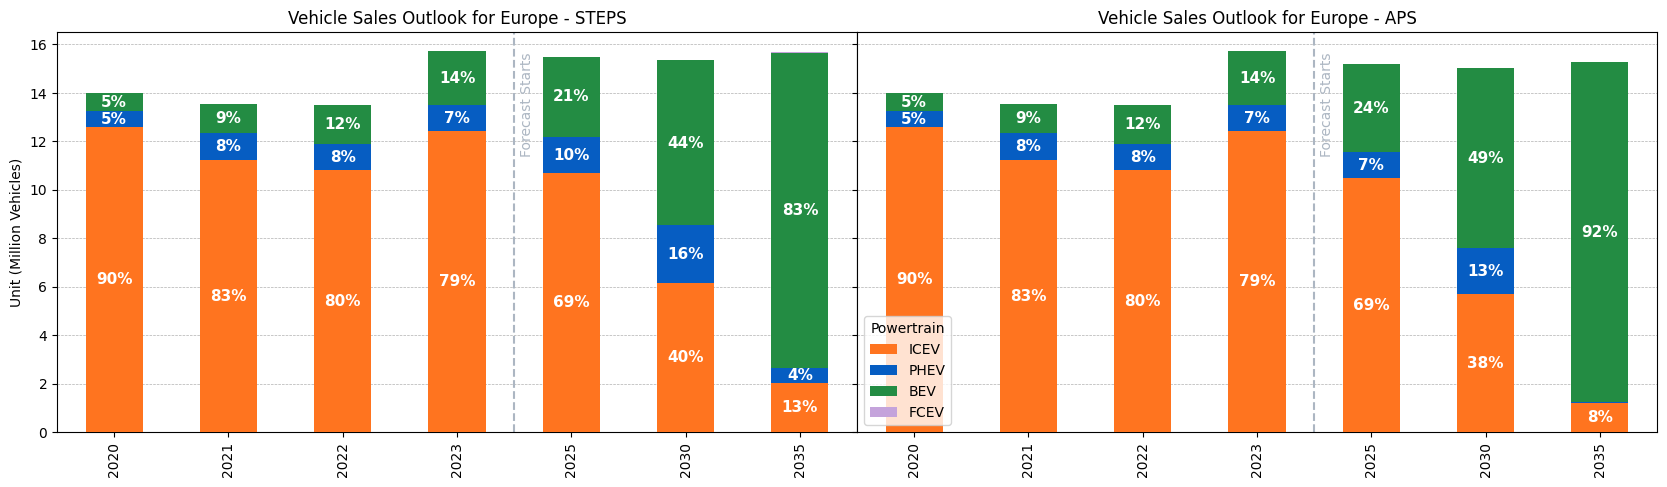

In [8]:

fig_width = 20
fig_height = 5

# Insert the new color at the beginning of the list

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(fig_width,fig_height), sharey=True)

outlook_sales_STEPS.plot(kind='bar', stacked=True, ax=ax1, color=colors_all,zorder=3)
ax1.set_title('Vehicle Sales Outlook for Europe - STEPS')
ax1.get_legend().set_visible(False)

outlook_sales_APS.plot(kind='bar', stacked=True, ax=ax2, color=colors_all,zorder=3)
ax2.set_title('Vehicle Sales Outlook for Europe - APS')
ax2.legend(title='Powertrain')

for ax in [ax1, ax2]:
    ax.axvline(x=3.5, color=grey_color, linestyle='--') 
    ax.text(3.55, ax.get_ylim()[1] * 0.95, 'Forecast Starts', rotation=90, verticalalignment='top',color=grey_color)
    ax.set_ylabel('Unit (Million Vehicles)')
    ax.set_xlabel(None)
    ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

# Function to add percentage labels
def add_percentage_labels(ax, data):
    for container in ax.containers:
        for i, bar in enumerate(container):
            height = bar.get_height()
            total = 100
            total = data.iloc[i].sum()
            percentage = height / total * 100
            if height > 0.5:  # Only add labels if height is greater than 0
                ax.annotate(f'{percentage:.0f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            ha='center', va='center', fontsize=11, fontweight="bold",color='white')

# Add percentage labels to both plots
add_percentage_labels(ax1, outlook_sales_STEPS)
add_percentage_labels(ax2, outlook_sales_APS)


# Show the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.0)
plt.savefig("charts/chart_vehicles_sales.png", dpi=100,  bbox_inches='tight')
plt.show()

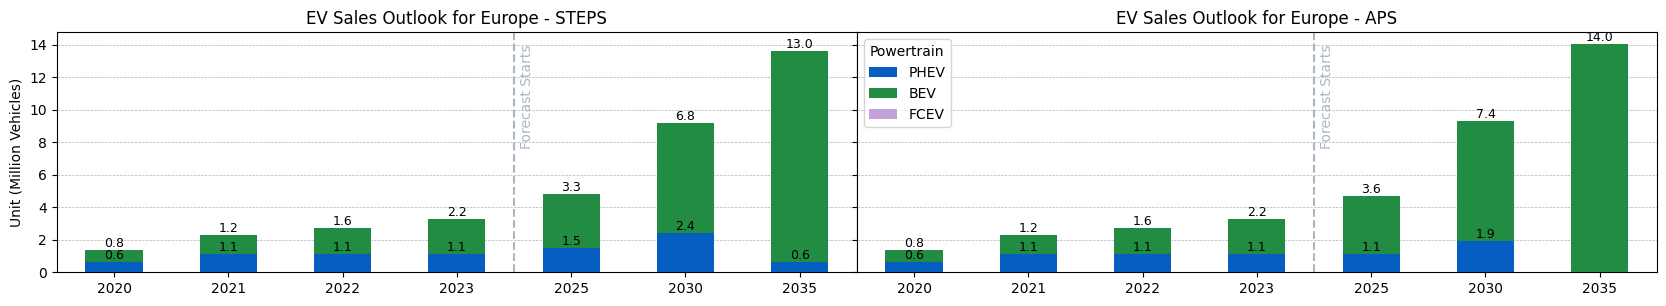

In [9]:
fig_width = 20
fig_height = 3


outlook_sales_APS_EV = outlook_sales_APS[EV_list]
outlook_sales_STEPS_EV = outlook_sales_STEPS[EV_list]

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(fig_width,fig_height), sharey=True)

outlook_sales_STEPS_EV.plot(kind='bar', stacked=True, ax=ax1, color=colors_ev,zorder=3)
ax1.set_title('EV Sales Outlook for Europe - STEPS')
ax1.get_legend().set_visible(False)
    
outlook_sales_APS_EV.plot(kind='bar', stacked=True, ax=ax2, color=colors_ev,zorder=3)
ax2.set_title('EV Sales Outlook for Europe - APS')
ax2.legend(title='Powertrain')

for ax in [ax1, ax2]:
    ax.axvline(x=3.5, color=grey_color, linestyle='--') 
    ax.text(3.55, ax.get_ylim()[1] * 0.95, 'Forecast Starts', rotation=90, verticalalignment='top',color=grey_color)
    ax.set_xlabel(None)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
    ax.set_ylabel('Unit (Million Vehicles)')

for ax in [ax1,ax2]:
    for container in ax.containers:
        labels = [f'{v.get_height():,.1f}' if v.get_height() > 0.1 else '' for v in container]
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=9)


# Show the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.0)
plt.savefig("charts/chart_EV_sales.png", dpi=100,  bbox_inches='tight')
plt.show()

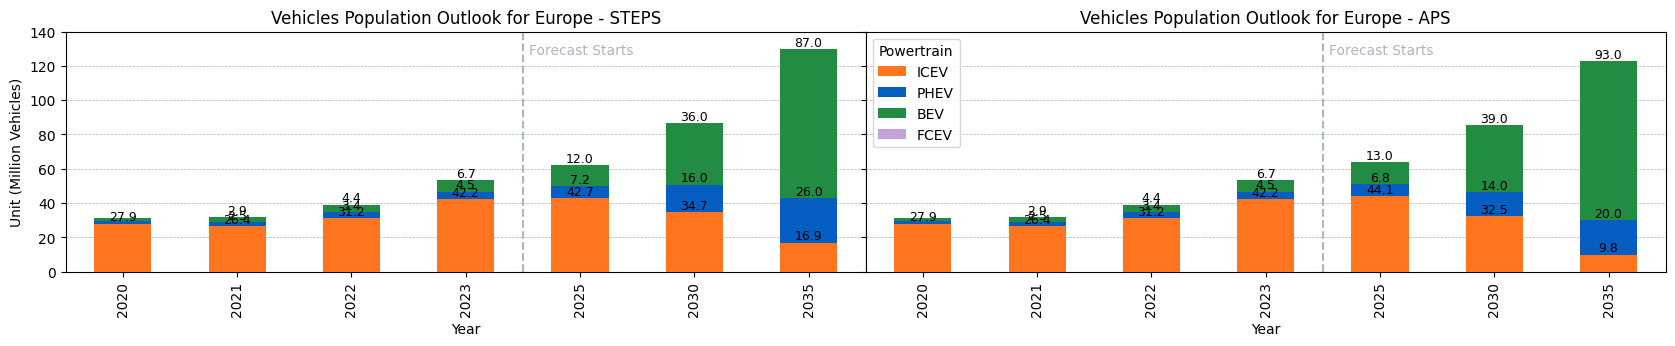

In [10]:
# exploring car POPULATION 
fig_width = 20
fig_height = 3

file_path = "data/outlook_vehicles_stock.csv"

outlook = pd.read_csv(file_path)
outlook.drop(columns=["region"],inplace=True)
outlook.iloc[:, 2:] = outlook.iloc[:, 2:] / 1000000 # in million vehicles

outlook_stock_APS = outlook[outlook.category=="Projection-APS"]
outlook_stock_APS.set_index(keys=["year"],inplace=True)
outlook_stock_STEPS = outlook[outlook.category=="Projection-STEPS"]
outlook_stock_STEPS.set_index(keys=["year"],inplace=True)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(fig_width,fig_height), sharey=True)

outlook_stock_STEPS.plot(kind='bar', stacked=True, ax=ax1, color=colors_all,zorder=3)
ax1.set_title('Vehicles Population Outlook for Europe - STEPS')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unit (Vehicles)')
ax1.set_ylim(0,140)
ax1.get_legend().set_visible(False)

outlook_stock_APS.plot(kind='bar', stacked=True, ax=ax2, color=colors_all,zorder=3)
ax2.set_title('Vehicles Population Outlook for Europe - APS')
ax2.legend(title='Powertrain')

for ax in [ax1, ax2]:
    ax.axvline(x=3.5, color=grey_color, linestyle='--') 
    ax.text(3.55, ax.get_ylim()[1] * 0.95, 'Forecast Starts', rotation=0, verticalalignment='top',color=grey_color)
    ax.set_xlabel("Year")
    ax.set_ylabel('Unit (Million Vehicles)')
    ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

for ax in [ax1,ax2]:
    for container in ax.containers:
        labels = [f'{v.get_height():,.1f}' if v.get_height() > 2 else '' for v in container]
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=9)


ax1.get_legend().set_visible(False)

# Show the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.0)
plt.savefig("charts/chart_vehicles_stock.png", dpi=300,  bbox_inches='tight')
plt.show()

In [11]:
file_path = "inputs/input_sectors_group.csv"
sectors_list = pd.read_csv(file_path)

sector_agg = sectors_list["sector"].to_frame(name="original")
sector_agg = sector_agg.merge(sectors_list, left_on="original", right_on="sector", how="outer")
sector_agg["aggregated"] = sector_agg["classification"].fillna("Others") 
sector_agg = sector_agg[["original","aggregated"]]

In [12]:
# 1. ----------------------------------------------------
# explore differences carboon footprint between vehicles 

# Function to create the heatmap
def heatmap_emission_differences():
    vmax_par = 3E2
    cmap_par = 'YlOrRd'
    fmt_par = ",.2f"
    linewidths_par = 0.1
    cbar_pad_par = 0.01
    
    
    # Loop through the list of vehicles and create a heatmap for each
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(vehicles_list), figsize=(heatmap_width,heatmap_height), sharey=True)

    for ax,vehicle in zip(axes,vehicles_list):
        df = emission_pivot.loc[vehicle]
        #df["aggregated_sector"] = "["+df["aggregated"]+"] "+df["sector"] 
        heatmap = sns.heatmap(df, ax=ax, annot=True, cmap=cmap_par,
                              vmax=vmax_par, linewidths=linewidths_par, fmt=fmt_par, 
                              cbar=False,cbar_kws={'label': 'kg CO2 Equivalent','pad': cbar_pad_par})
        total = emission_total.loc[vehicle].values[0]
        ax.set_title(f"{vehicle} \n Total : {total:,.2f} Kg CO2 eq",fontweight='bold',fontsize=12)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        
        separators = []
        for i in range(1, len(df.index)):
            if df.index[i][0] != df.index[i - 1][0]:
                separators.append(i)
        for sep in separators:
            ax.axhline(sep, color='black', linestyle='--', linewidth=2)

        # reformat y labels
        new_y_labels = [f'[{level0}] {level1}' for level0, level1 in df.index]
        ax.set_yticklabels(new_y_labels)
            
    plt.yticks(rotation=90)
    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2,wspace=0.1)
    plt.savefig('charts/heatmap_vehicles_footprint'+demand+'.png', dpi=100,  bbox_inches='tight')
    plt.show()

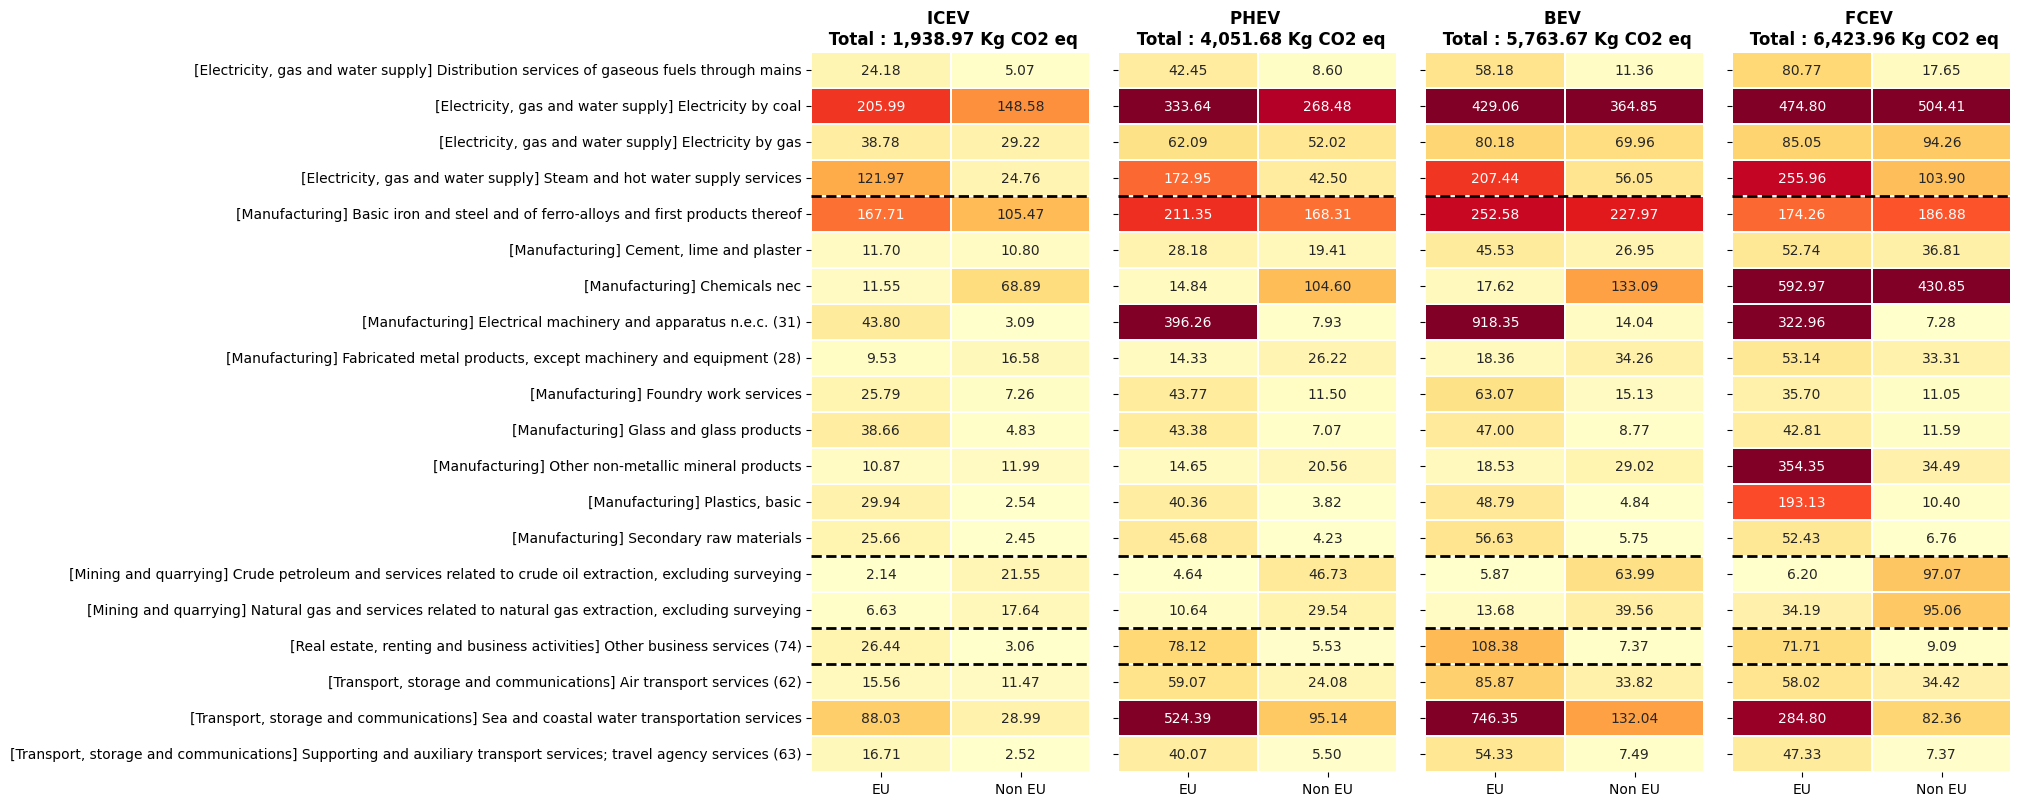

In [13]:
demand = "EU100"
top_sector_number = 20
heatmap_width = 20
heatmap_height = 12
file_path = "outputs/emission_footprint_"+demand+".csv"
emission = pd.read_csv(file_path)
emission = emission.merge(sector_agg, left_on="sector", right_on="original", how="outer").drop(columns="original")

emission_product = emission.melt(id_vars=["region","aggregated","sector"], value_vars=vehicles_list,
                    var_name='vehicles', value_name='emission')
emission_product["emission"] = 1000000*emission_product["emission"] # from gigagram to kilogram CO2 

emission_total_EU100 = emission_product.groupby("vehicles").sum("emission") ## total emission per vehicle
emission_total = emission_total_EU100

top_sectors = emission_product.groupby(['aggregated','sector'])['emission'].sum().reset_index().sort_values(by='emission', ascending=False).head(top_sector_number)
emission_top = emission_product[emission_product.sector.isin(top_sectors["sector"].tolist())]

emission_pivot = emission_top.pivot_table(index=["vehicles","aggregated","sector"],columns=["region"],values=["emission"],aggfunc="sum",fill_value=0)
emission_pivot.columns = [col[1] for col in emission_pivot.columns]
heatmap_emission_differences()

emission_EU100 = emission_product.pivot_table(columns=["region"], index="vehicles", values='emission',aggfunc="sum")

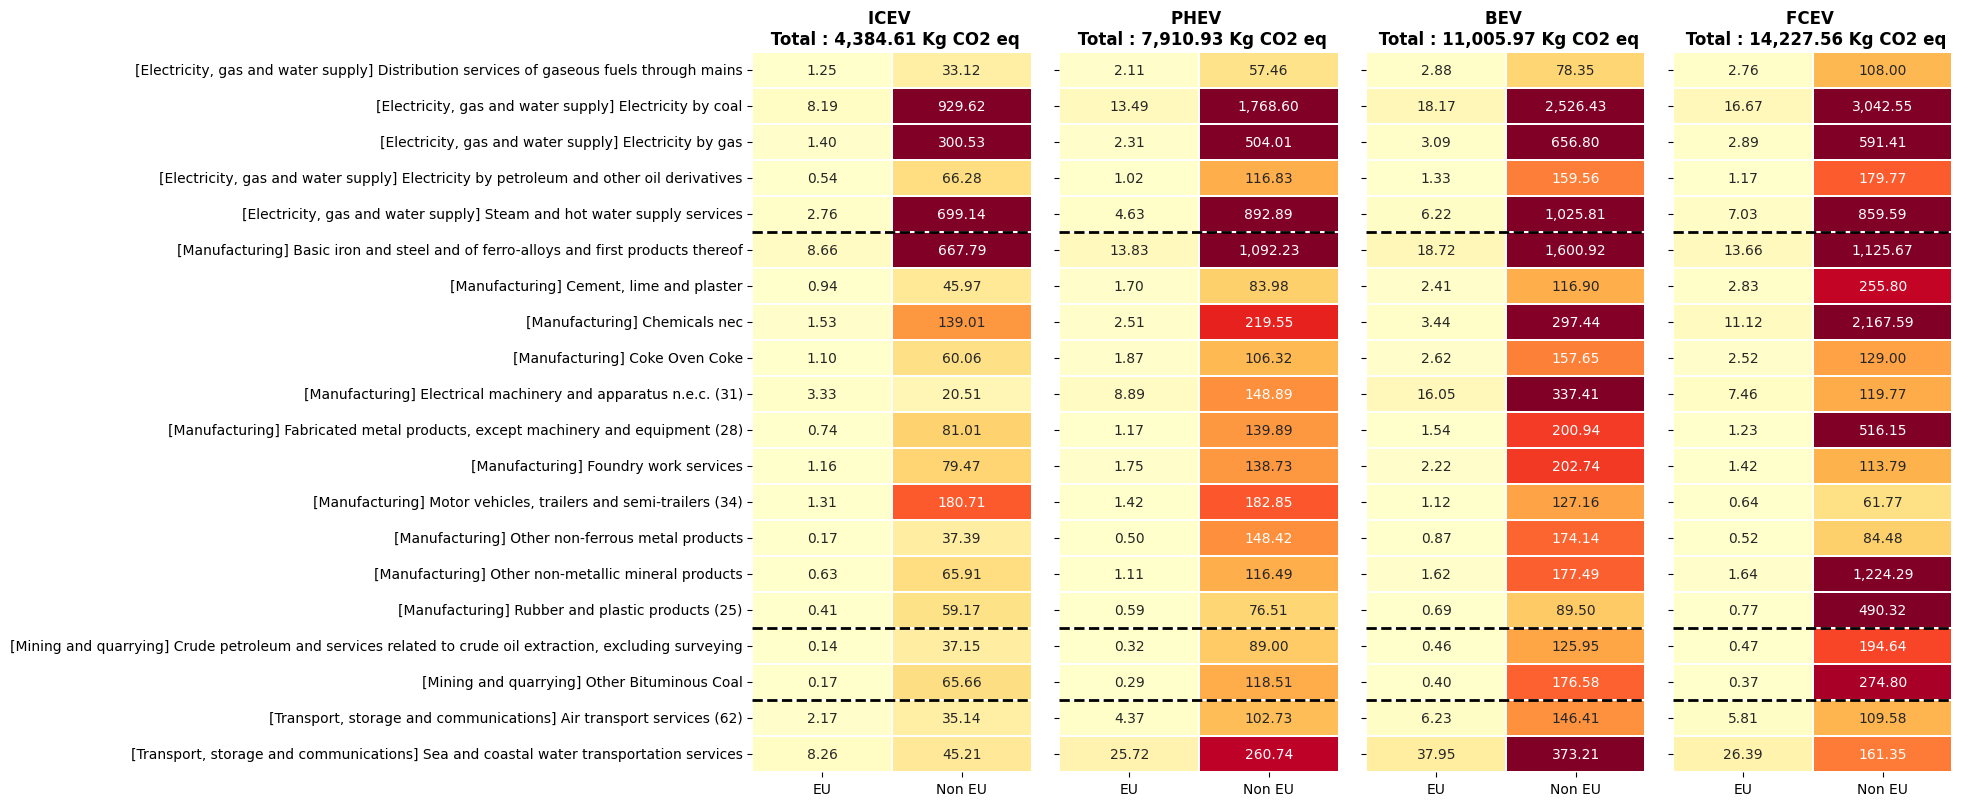

In [14]:
demand = "EU0"
top_sector_number = 20
heatmap_width = 20
heatmap_height = 12
file_path = "outputs/emission_footprint_"+demand+".csv"
emission = pd.read_csv(file_path)
emission = emission.merge(sector_agg, left_on="sector", right_on="original", how="outer").drop(columns="original")

emission_product = emission.melt(id_vars=["region","aggregated","sector"], value_vars=vehicles_list,
                    var_name='vehicles', value_name='emission')
emission_product["emission"] = 1000000*emission_product["emission"] # from gigagram to kilogram CO2 

emission_total_EU0 = emission_product.groupby("vehicles").sum("emission") ## total emission per vehicle
emission_total = emission_total_EU0

top_sectors = emission_product.groupby(['aggregated','sector'])['emission'].sum().reset_index().sort_values(by='emission', ascending=False).head(top_sector_number)
emission_top = emission_product[emission_product.sector.isin(top_sectors["sector"].tolist())]

emission_pivot = emission_top.pivot_table(index=["vehicles","aggregated","sector"],columns=["region"],values=["emission"],aggfunc="sum",fill_value=0)
emission_pivot.columns = [col[1] for col in emission_pivot.columns]
heatmap_emission_differences()

emission_EU0 = emission_product.pivot_table(columns=["region"], index="vehicles", values='emission',aggfunc="sum")

In [21]:
vehicles_order = ['ICEV', 'PHEV', 'BEV', 'FCEV']
emission_EU100 = emission_EU100.reindex(vehicles_order)
emission_EU0 = emission_EU0.reindex(vehicles_order)

emission_total_EU100 = emission_total_EU100.reindex(vehicles_order)
emission_total_EU0 = emission_total_EU0.reindex(vehicles_order)

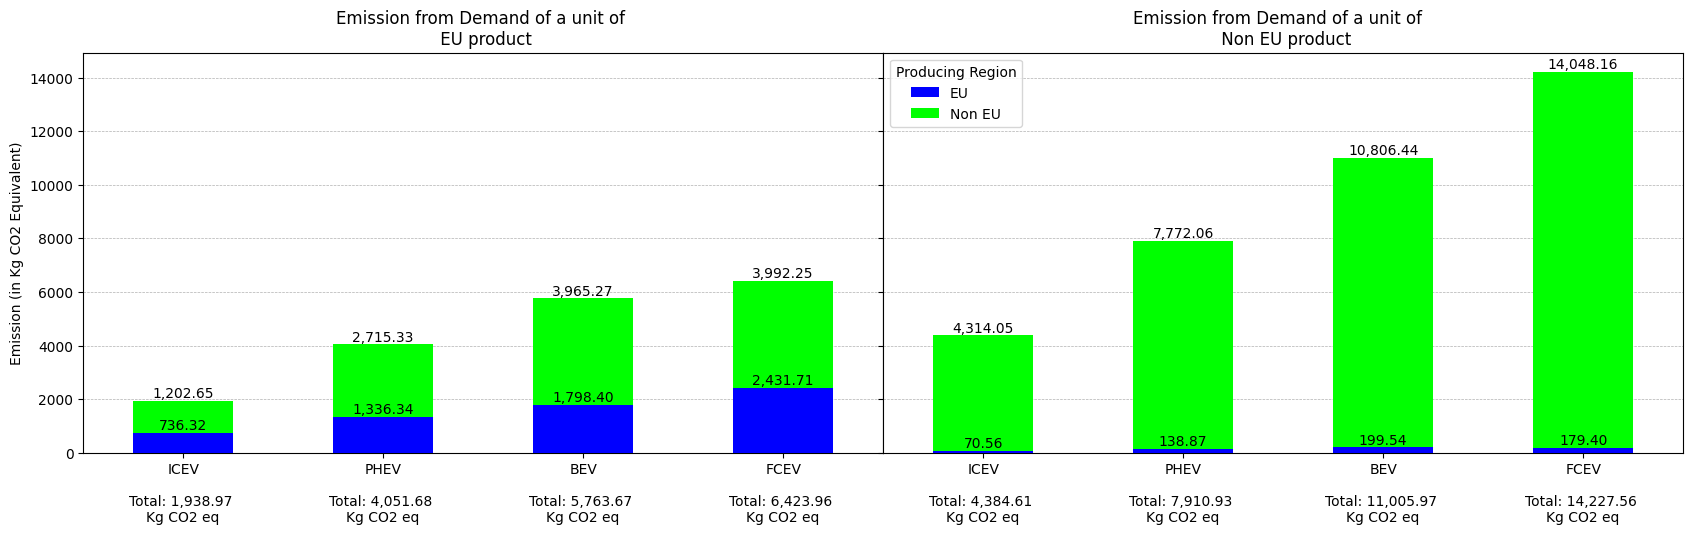

In [22]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)
colors = ["blue","lime"]

emission_EU100 = emission_EU100[["Non EU","EU"]]

emission_EU100.plot(kind='bar', stacked=True, ax=ax1, color = colors, zorder=3)
ax1.set_title('Emission from Demand of a unit of \n EU product')
ax1.set_ylabel('Emission (in Kg CO2 Equivalent)')
ax1.set_xlabel(None)
ax1.get_legend().set_visible(False)

emission_EU0.plot(kind='bar', stacked=True, ax=ax2, color = colors, zorder=3)
ax2.set_title('Emission from Demand of a unit of  \n Non EU product')
ax2.set_ylabel('Emission')
ax2.set_xlabel(None)


ax2.legend(title='Producing Region')

# Adding total annotations on top of each bar
for ax in [ax1, ax2]:
    for container in ax.containers:
        labels = [f'{v.get_height():,.2f}' for v in container]
        ax.bar_label(container, label_type='edge', labels=labels)

xtick_labels = [label.get_text() for label in ax1.get_xticklabels()]
custom_xtick_labels_EU100 = [f'{label}\n\nTotal: {emission_total_EU100.iloc[i].values[0]:,.2f} \nKg CO2 eq' for i,label in enumerate(xtick_labels)]
xtick_labels = [label.get_text() for label in ax2.get_xticklabels()]
custom_xtick_labels_EU0 = [f'{label}\n\nTotal: {emission_total_EU0.iloc[i].values[0]:,.2f} \nKg CO2 eq' for i,label in enumerate(xtick_labels)]

ax1.set_xticklabels(custom_xtick_labels_EU100, rotation=0)
ax2.set_xticklabels(custom_xtick_labels_EU0, rotation=0)

ax1.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
ax2.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)


# Show the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.0)
plt.savefig("charts/chart_emission_by_vehicles_region.png", dpi=100,  bbox_inches='tight')
plt.show()

In [160]:













# SPACER

In [15]:
file_path = "data/outlook_battery_stock.csv"
outlook = pd.read_csv(file_path) 
# convert to mega unit 
outlook["outlook"] = outlook["outlook"] /1000000
outlook["battery_outlook"] = outlook["battery_outlook"] /1000000

outlook.loc[outlook.vehicles=="ICEV","battery_outlook"] = 0
battery_outlook = outlook.pivot_table(index=["category","year"], columns="vehicles", values=["outlook","battery_outlook"])

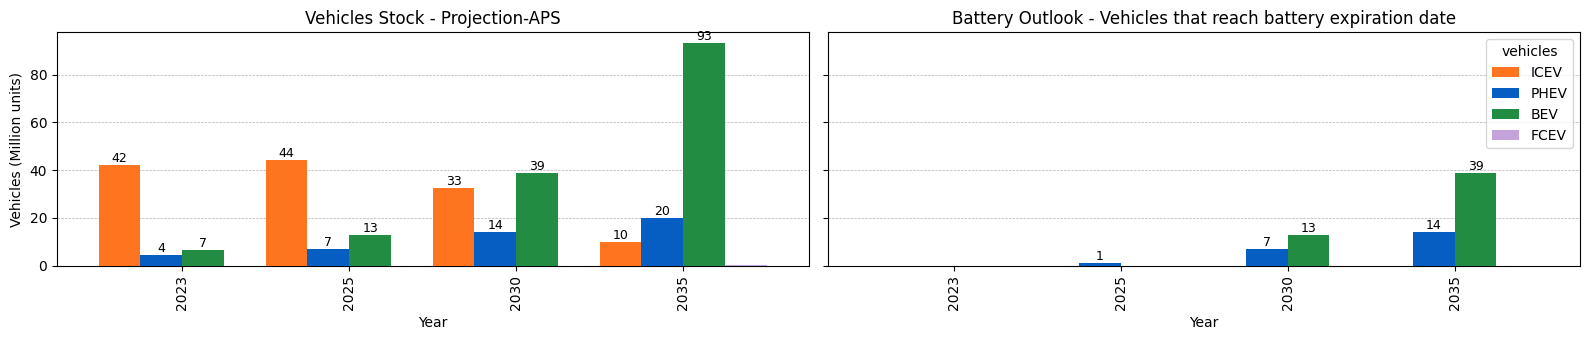

In [16]:
# Plotting the data
fig_width=16
fig_height=3.5

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(fig_width, fig_height), sharey=True)
scenario = "Projection-APS"

battery_outlook = battery_outlook.loc[battery_outlook.index.get_level_values("year").isin(year_list)]

data = battery_outlook.loc[scenario]["outlook"]
data = data[vehicles_list]
# Battery Outlook Chart
data.plot(kind="bar",ax=axs[0],width=1, color = colors_all,zorder=3)
axs[0].set_title(f'Vehicles Stock - {scenario}')
axs[0].set_ylabel('Vehicles (Million units)')
axs[0].set_xlabel('Year')
axs[0].get_legend().set_visible(False)
axs[0].yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
    

data = battery_outlook.loc[scenario]["battery_outlook"]
data = data[vehicles_list]
# Battery Outlook Chart
data.plot(kind="bar",ax=axs[1], width=1,color = colors_all,zorder=3)
axs[1].set_title(f'Battery Outlook - Vehicles that reach battery expiration date')
axs[1].set_xlabel('Year')
axs[1].yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

for ax in axs:
    for container in ax.containers:
        labels = [f'{v.get_height():,.0f}' if v.get_height() >= 1 else '' for v in container]
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=9)

plt.tight_layout()
plt.savefig("charts/chart_battery_stock.png",dpi=300,  bbox_inches='tight')
plt.show()

In [ ]:








#spacer

In [17]:
# ===================================================
# exploring footprint between STAGES 
scenario = scenario_list[0]

data_perstage = {}
data_perregion = {}

for demand in demand_list:
    file_path = "outputs/emission_by_stage_all_"+demand+".csv"
    emission_stages = pd.read_csv(file_path) 
    emission_stages["emission"] = emission_stages["emission"] * 0.001 # from Gg to Metric Tones

    #emission_stages = emission_stages[emission_stages.scenario == scenario] ## select scenario
    
    vehicle_order = ['ICEV', 'PHEV', 'BEV', 'FCEV']
    
    #emission_grouped.drop(columns=["vehicles","year"],inplace=True)
    emission_grouped = emission_stages.pivot_table(index=["scenario","vehicles","year"], columns='stage', values='emission', aggfunc="sum", fill_value=0).reset_index()
    emission_grouped['vehicles'] = pd.Categorical(emission_grouped['vehicles'], categories=vehicle_order, ordered=True)
    emission_grouped = emission_grouped.sort_values(["scenario",'vehicles', 'year'])
    
    # Summing emissions grouped by vehicle type, region, and then stage for stacking
    emission_grouped.set_index(keys=["scenario","vehicles","year"],inplace=True)
    #print("Demand "+demand)
    
    data_perstage[demand] = emission_grouped.copy()

    # ------------------------------------------------------------------------------------------------------- data per regional
    emission_grouped = emission_stages.pivot_table(index=["scenario","vehicles","year"], columns='region', values='emission', aggfunc="sum", fill_value=0).reset_index()
    emission_grouped['vehicles'] = pd.Categorical(emission_grouped['vehicles'], categories=vehicle_order, ordered=True)
    emission_grouped = emission_grouped.sort_values(["scenario",'vehicles', 'year'])
    
    emission_grouped.set_index(keys=["scenario","vehicles","year"],inplace=True)
    
    data_perregion[demand] =  emission_grouped.copy()

Demand normal
Demand EU100
Demand EU0


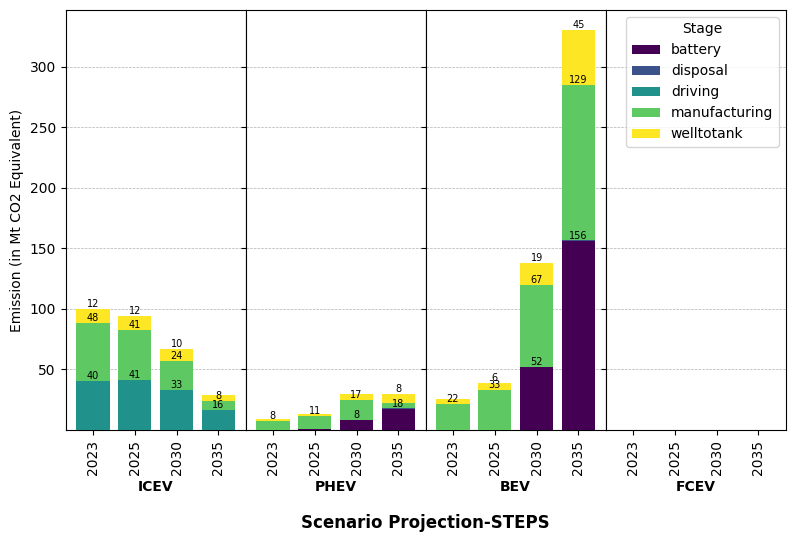

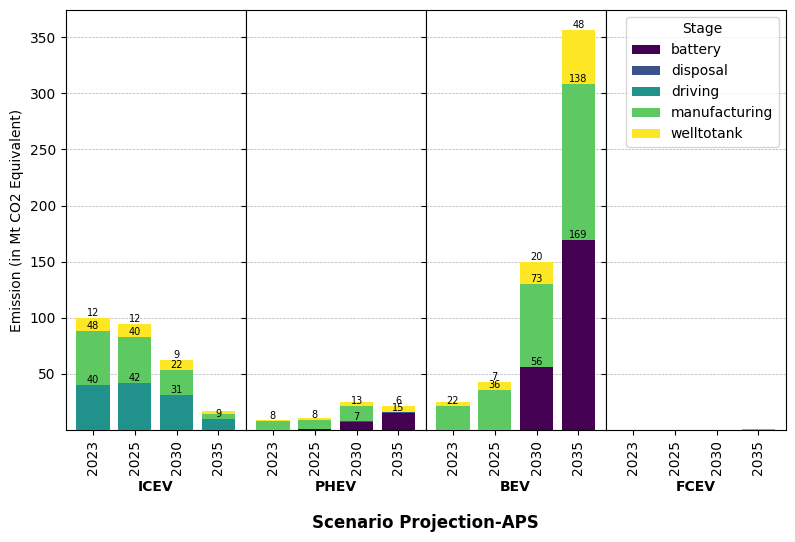

In [18]:
demand = "normal"

colormap_par = "viridis"
fig_height = 7
fig_width = 12
bar_width = 0.8
label_size = 7
subplot_number = len(vehicles_list)

#plotting
scenario = "Projection-STEPS"
emission_grouped = data_perstage[demand].loc[scenario]
fig, axes = plt.subplots(nrows=1, ncols=subplot_number, figsize=(fig_width, fig_height), sharey=True)

for ax, vehicles in zip(axes,vehicles_list):
    emission_grouped.loc[vehicles].plot(kind='bar', stacked=True, width=bar_width, colormap=colormap_par,ax=ax,zorder=3)
    # Adding titles and labels
    ax.set_xlabel(vehicles,fontweight="bold")
    ax.set_ylabel('Emission (in Mt CO2 Equivalent)')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
    ax.legend().set_visible(False)

for ax in axes:
    for container in ax.containers:
        labels = [f'{v.get_height():,.0f}' if v.get_height() >= 5 else '' for v in container]
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=label_size)

# Show the plot
fig.suptitle(f'Scenario {scenario}',ha='center',y=0.08, fontweight="bold")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2,wspace=0)
plt.legend(title='Stage')
plt.savefig("charts/chart_emission_by_stage_"+scenario+"_"+demand+".png", dpi=100,  bbox_inches='tight')
plt.show()

#=========================================================
#plotting
scenario = "Projection-APS"
emission_grouped = data_perstage[demand].loc[scenario]
fig, axes = plt.subplots(nrows=1, ncols=subplot_number, figsize=(fig_width, fig_height), sharey=True)

for ax, vehicles in zip(axes,vehicles_list):
    emission_grouped.loc[vehicles].plot(kind='bar', stacked=True, width=bar_width, colormap=colormap_par,ax=ax,zorder=3)
    # Adding titles and labels
    ax.set_xlabel(vehicles,fontweight="bold")
    ax.set_ylabel('Emission (in Mt CO2 Equivalent)')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
    ax.legend().set_visible(False)

for ax in axes:
    for container in ax.containers:
        labels = [f'{v.get_height():,.0f}' if v.get_height() >= 5 else '' for v in container]
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=label_size)

# Show the plot
fig.suptitle(f'Scenario {scenario}',ha='center',y=0.08, fontweight="bold")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2,wspace=0)
plt.legend(title='Stage')
plt.savefig("charts/chart_emission_by_stage_"+scenario+"_"+demand+".png", dpi=100,  bbox_inches='tight')
plt.show()

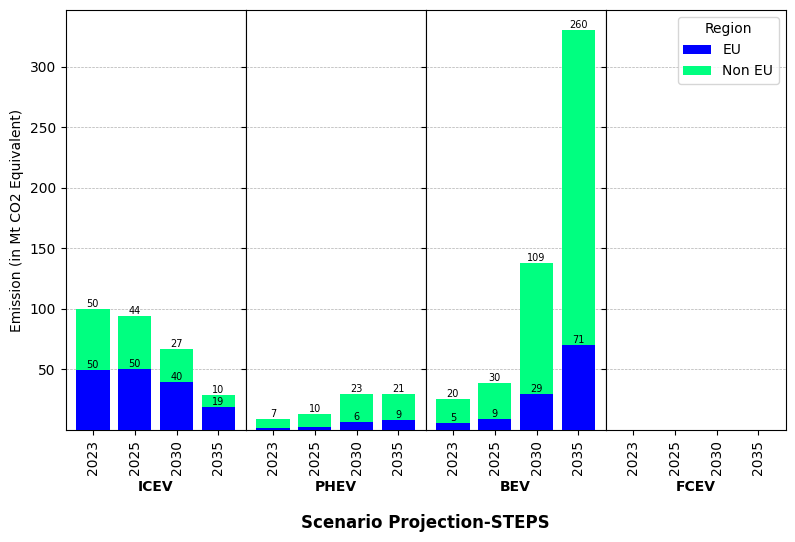

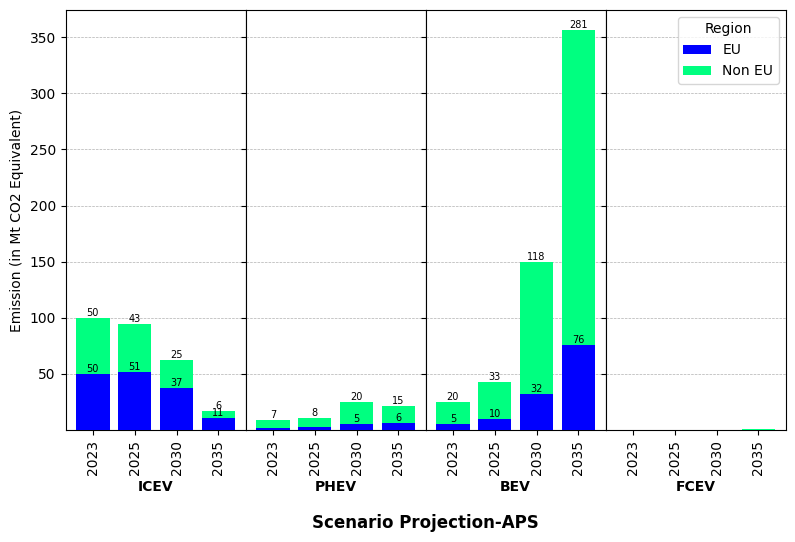

In [19]:
colormap_par = "winter"
subplot_number = len(vehicles_list)

#plotting
scenario = "Projection-STEPS"
emission_grouped = data_perregion[demand].loc[scenario]
# Plotting the stacked bar chart
fig, axes = plt.subplots(nrows=1, ncols=subplot_number, figsize=(fig_width, fig_height), sharey=True)

for ax, vehicles in zip(axes,vehicles_list):
    emission_grouped.loc[vehicles].plot(kind='bar', width=bar_width, stacked=True, colormap=colormap_par,ax=ax,zorder=3)
    # Adding titles and labels
    ax.set_xlabel(vehicles,fontweight="bold")
    ax.set_ylabel('Emission (in Mt CO2 Equivalent)')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
    ax.legend().set_visible(False)

for ax in axes:
    for container in ax.containers:
        labels = [f'{v.get_height():,.0f}' if v.get_height() >= 5 else '' for v in container]
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=label_size)

# Show the plot
fig.suptitle(f'Scenario {scenario}',ha='center',y=0.08, fontweight="bold")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2,wspace=0)
plt.legend(title='Region')
plt.savefig("charts/chart_emission_by_region_"+scenario+"_"+demand+".png", dpi=100,  bbox_inches='tight')
plt.show()


#plotting
scenario = "Projection-APS"
emission_grouped = data_perregion[demand].loc[scenario]
# Plotting the stacked bar chart
fig, axes = plt.subplots(nrows=1, ncols=subplot_number, figsize=(fig_width, fig_height), sharey=True)

for ax, vehicles in zip(axes,vehicles_list):
    emission_grouped.loc[vehicles].plot(kind='bar', width=bar_width, stacked=True, colormap=colormap_par,ax=ax,zorder=3)
    # Adding titles and labels
    ax.set_xlabel(vehicles,fontweight="bold")
    ax.set_ylabel('Emission (in Mt CO2 Equivalent)')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
    ax.legend().set_visible(False)

for ax in axes:
    for container in ax.containers:
        labels = [f'{v.get_height():,.0f}' if v.get_height() >= 5 else '' for v in container]
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=label_size)

# Show the plot
fig.suptitle(f'Scenario {scenario}',ha='center',y=0.08, fontweight="bold")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2,wspace=0)
plt.legend(title='Region')
plt.savefig("charts/chart_emission_by_region_"+scenario+"_"+demand+".png", dpi=100,  bbox_inches='tight')
plt.show()


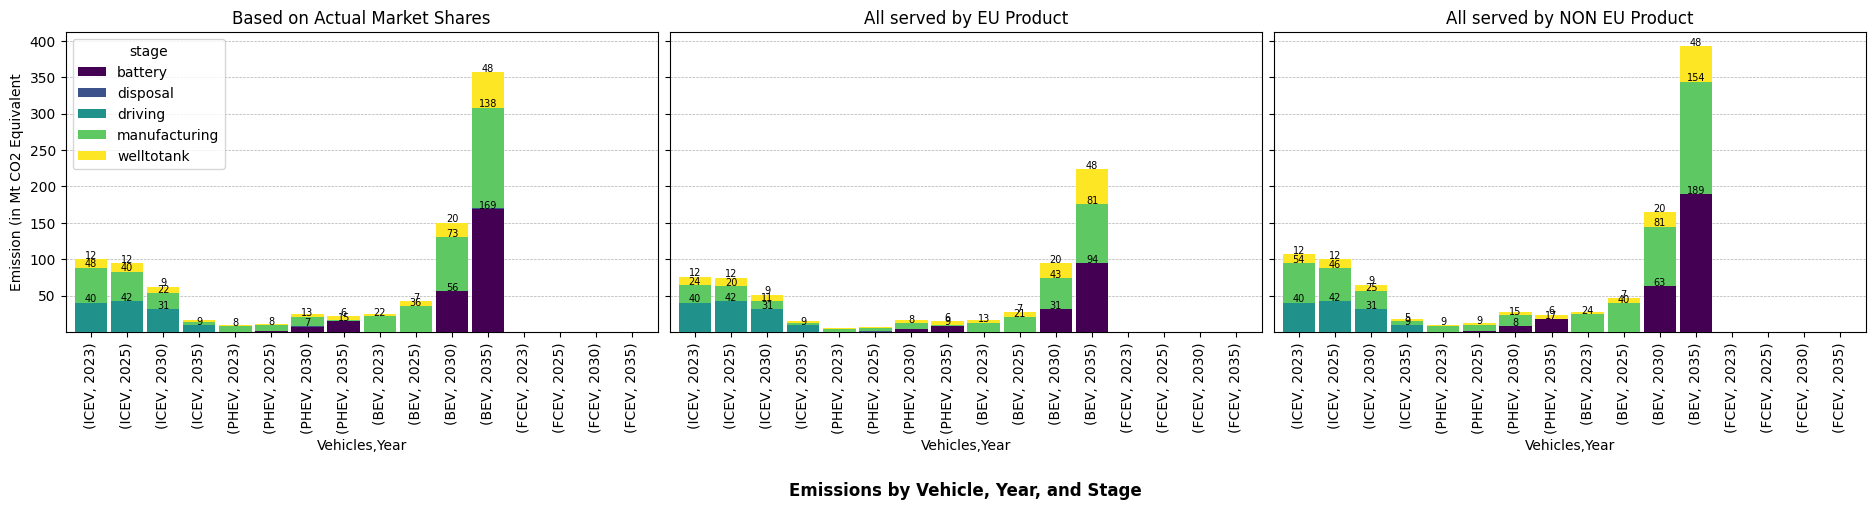

In [20]:
stage_colors = {
    'battery': '#99aabf',        
    'disposal': '#ff7f0e',       
    'driving': '#e6b225',        
    'manufacturing': '#e68197',  
    'welltotank': '#d4de95'      
}


colormap_par ="viridis"

fig_width = 30 
fig_height = 5 
bar_width = 0.9

scenario = "Projection-APS" 
fig, axes = plt.subplots(nrows=1, ncols=len(data_perstage), figsize=(fig_width,fig_height), sharey=True)

i = 0 
for demand,data in data_perstage.items(): 
    data = data.loc[scenario] 
    data.plot(kind='bar', stacked=True, width=bar_width, cmap=colormap_par, ax=axes[i],zorder=3)

    # Adding titles and labels
    axes[i].set_title(demand_label[demand])
    axes[i].set_xlabel('Vehicles,Year')
    axes[i].set_ylabel('Emission (in Mt CO2 Equivalent')
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    axes[i].yaxis.grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)
    axes[i].xaxis.grid(False)
    
    if (i>0):axes[i].legend().set_visible(False)
    i = i+1
    
for ax in axes: 
    for container in ax.containers: 
        labels = [f'{v.get_height():,.0f}' if v.get_height() >= 5 else '' for v in container] 
        #ax.bar_label(container, label_type='center', labels=labels, fontsize=6, fontweight="bold", color="white")
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=label_size, padding=-1)

#Show the plot
fig.suptitle('Emissions by Vehicle, Year, and Stage',y=-0.1, fontweight="bold") 
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2, wspace=0.02) 
plt.savefig("charts/chart_emission_by_stage_"+scenario+".png", dpi=100, bbox_inches='tight') 
plt.show()

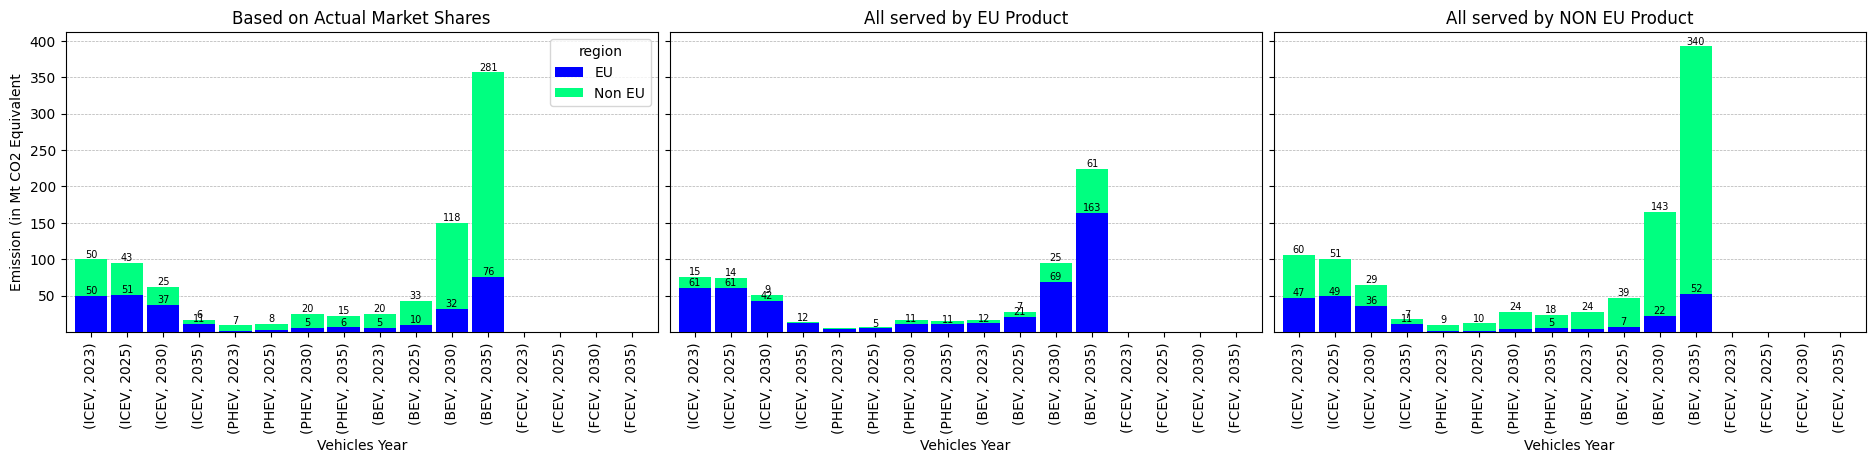

In [21]:
colormap_par ="winter"

fig, axes = plt.subplots(nrows=1, ncols=len(data_perstage), figsize=(fig_width,fig_height), sharey=True)

i = 0
for demand,data in data_perregion.items(): 
    data = data.loc[scenario]
    data.plot(kind='bar', stacked=True, cmap=colormap_par, width=bar_width,ax=axes[i], zorder=3)

    # Adding titles and labels
    axes[i].set_title(demand_label[demand])
    axes[i].set_xlabel('Vehicles Year')
    axes[i].set_ylabel('Emission (in Mt CO2 Equivalent')
    axes[i].yaxis.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
    axes[i].xaxis.grid(False)
    if (i>0):axes[i].legend().set_visible(False)
    i = i+1

for ax in axes: 
    for container in ax.containers: 
        labels = [f'{v.get_height():,.0f}' if v.get_height() >= 5 else '' for v in container] 
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=label_size)

# Show the plot
#fig.suptitle('Emissions by Vehicles Year and Produced Regions',y=-0.1, fontweight="bold")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2, wspace=0.02)
plt.savefig("charts/chart_emission_by_region_"+scenario+".png", dpi=100,  bbox_inches='tight')
plt.show()